## 1. Import library

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## 2. Read data

In [2]:
yellow_17_1 = pd.read_csv("../raw_data/yellow_tripdata_2017-01.csv")
yellow_17_2 = pd.read_csv("../raw_data/yellow_tripdata_2017-02.csv")
yellow_17_3 = pd.read_csv("../raw_data/yellow_tripdata_2017-03.csv")
yellow = pd.concat([yellow_17_1, yellow_17_2, yellow_17_3])

In [3]:
weather = pd.read_csv('../raw_data/weather.csv')


In [4]:
del yellow_17_1, yellow_17_2, yellow_17_3

In [5]:
yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.00,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.00,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.00,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.00,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294623,1,2017-03-31 15:15:44,2017-03-31 15:16:53,2,0.00,1,Y,264,264,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80
10294624,1,2017-03-31 15:21:14,2017-03-31 15:22:49,1,0.00,2,Y,264,264,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
10294625,1,2017-03-31 15:23:11,2017-03-31 15:24:13,3,0.00,3,Y,264,264,2,20.5,0.0,0.0,0.00,5.76,0.3,26.56
10294626,1,2017-03-31 15:24:34,2017-03-31 15:26:25,2,0.00,5,Y,264,264,2,136.0,0.0,0.0,0.00,5.76,0.3,142.06


## 3. Feature engineering

In [6]:
yellow.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [7]:
yellow['tpep_pickup_datetime'] = pd.to_datetime(yellow['tpep_pickup_datetime'],
                             format='%Y-%m-%d %H:%M', errors='coerce')
yellow['tpep_dropoff_datetime'] = pd.to_datetime(yellow['tpep_dropoff_datetime'],
                             format='%Y-%m-%d %H:%M', errors='coerce')

yellow['duration'] = (yellow['tpep_dropoff_datetime'] -
                  yellow['tpep_pickup_datetime']).dt.seconds.astype(int) /60
yellow["revenue"] = (yellow['tip_amount'] + yellow['fare_amount'])/yellow['duration'] *60
yellow['pickup_hour'] =  yellow['tpep_pickup_datetime'].dt.hour
yellow['weekdays'] = yellow['tpep_pickup_datetime'].dt.day_name()
yellow['datehours'] = yellow['tpep_pickup_datetime'].dt.strftime('%d-%H')

In [8]:
yellow['pickup_date'] =  yellow['tpep_pickup_datetime'].dt.strftime('%m-%d')

In [9]:
weather['DATE'] = pd.to_datetime(weather['DATE']).dt.strftime('%m-%d')
weather.set_index('DATE', inplace=True)
weather.fillna(0, inplace = True)
weather['bad_day'] = weather['WT03'] + weather['WT04']

In [10]:
def bad_day(condition):
    if condition > 0:
        return 'bad'
    else:
        return 'not bad'

In [11]:
def add_weather(time):
    try:
        return weather['bad_day'].loc[time]
    except:
        return np.NaN
yellow['bad_day'] = yellow['pickup_date'].map(add_weather)


In [12]:
yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,duration,revenue,pickup_hour,weekdays,datehours,pickup_date,bad_day
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,...,0.0,0.3,15.30,12.283333,70.827680,11,Monday,09-11,01-09,0.0
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,...,0.0,0.3,7.25,3.566667,108.504673,11,Monday,09-11,01-09,0.0
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,...,0.0,0.3,7.30,3.750000,104.000000,11,Monday,09-11,01-09,0.0
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,...,0.0,0.3,8.50,5.383333,85.820433,11,Monday,09-11,01-09,0.0
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,...,0.0,0.3,52.80,0.000000,inf,0,Sunday,01-00,01-01,0.0


In [13]:
weather.head()

,STATION,NAME,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT06,WT08,bad_day
DATE,,,,,,,,,,,,
01-01,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,48,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0
01-02,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,41,37,1.0,0.0,0.0,1.0,0.0,0.0,1.0
01-03,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,43,39,1.0,0.0,0.0,0.0,0.0,0.0,0.0
01-04,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,52,34,1.0,0.0,0.0,0.0,0.0,1.0,0.0
01-05,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,34,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Data cleaning

### 4.1 remove noisy data 

In [14]:
yellow = yellow.loc[
    (yellow['passenger_count'] > 0) & (yellow['passenger_count'] < 5) &
    (yellow['trip_distance'] >= 0.01) &
    (yellow['total_amount'] >= 2.5) &
    (yellow['fare_amount'] >= 2.5) &
    (yellow['tolls_amount'] > 0) &
    (yellow['tip_amount'] > 0) &
    (yellow['payment_type'] == 1) &
    (yellow['total_amount'] >= 2.5) &
    (yellow['duration'] >= 0.5) & 
    (yellow['revenue'] > 0)
] 

In [15]:
yellow.drop(['VendorID', 'store_and_fwd_flag', 'improvement_surcharge', 'RatecodeID'], axis = 1, inplace = True)
yellow.dropna(inplace=True)


### 4.2 detect outliers

In [16]:
amount_cols = ['fare_amount', 'tip_amount', 'total_amount']

<AxesSubplot:>

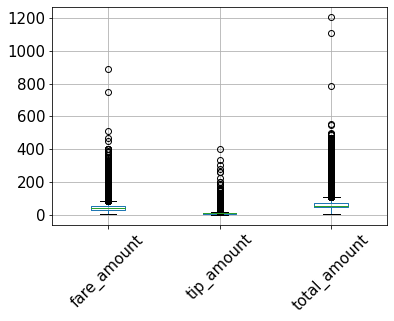

In [17]:
yellow.boxplot(column = amount_cols, rot = 45, fontsize=15)

### 4.3 remove outliers

In [18]:
amount_Q1 = yellow[amount_cols].quantile(0.25)
amount_Q3 = yellow[amount_cols].quantile(0.75)
amount_IQR = amount_Q3 - amount_Q1
yellow = yellow[~((yellow[amount_cols] > (amount_Q3 + 3 * amount_IQR)) | (yellow[amount_cols] < (amount_Q1 - 3 * amount_IQR))).any(axis=1)]


<AxesSubplot:>

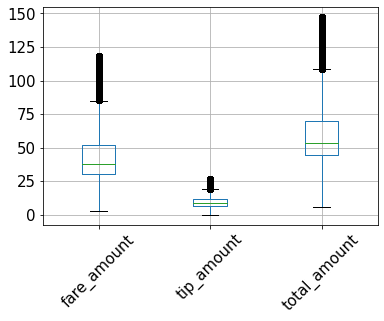

In [19]:
yellow.boxplot(column = amount_cols, rot = 45, fontsize=15)

## 5. Save to file

In [21]:
yellow.reset_index().to_feather('../preprocessed_data/yellow_cleaned.feather')

In [22]:
# del yellow_clean